Códigos e Gráficos - Projeto 3

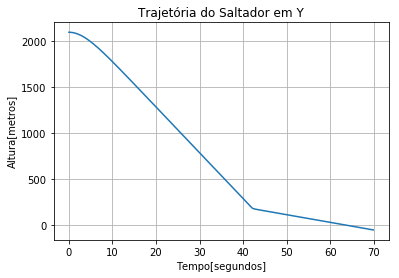

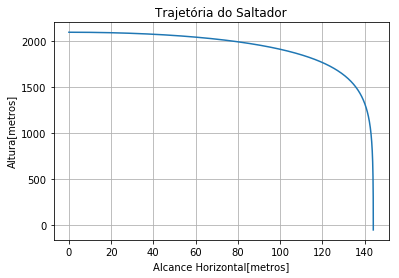

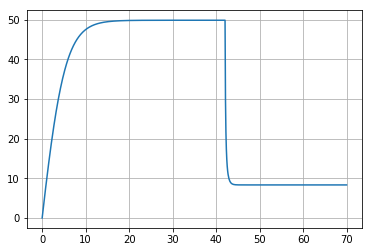

In [83]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

g = 9.8
#densidade do ar [kg/m^3]
p = 1.25
#massa do sistema, ou seja saltador+paraquedas [kg]
m = 140
#Cd será o coeficiente de arrasto que irá variar no tempo
#A por sua vez será a Área que também irá variar
t = np.arange(0,70,0.1)
def Cd(t):
    if t < 42:
        coef = 0.21
    else:
        coef = 1.2
    return coef
def A(t):
    if t < 42:
        Area = 4.205
    else:
        Area = 8.41*math.pi
    return Area
def EqDif(y,t):
    X = y[0]
    Vx = y[1]
    Y = y[2]
    Vy = y[3]
    dxdt = Vx
    dVxdt = -(1/2)*((p*Cd(t)*A(t)*((Vx**2)+(Vy**2)))/m)*(Vx/((math.sqrt((Vx**2)+(Vy**2)))))
    dydt = Vy
    dVydt = -(1/2)*((p*Cd(t)*A(t)*((Vx**2)+(Vy**2)))/m)*(Vy/((math.sqrt((Vx**2)+(Vy**2))))) - g
    return [dxdt,dVxdt,dydt,dVydt]
X0 = 0
Vx0 = 20
Y0 = 2100
Vy0 = 0
C0 = [X0,Vx0,Y0,Vy0]
solução = odeint(EqDif,C0,t)

plt.plot(t,solução[:,2])
plt.title("Trajetória do Saltador em Y")
plt.xlabel("Tempo[segundos]")
plt.ylabel("Altura[metros]")
plt.grid()
plt.show()

plt.plot(solução[:,0],solução[:,2])
plt.title("Trajetória do Saltador")
plt.xlabel("Alcance Horizontal[metros]")
plt.ylabel("Altura[metros]")
plt.grid()
plt.show()

plt.plot(t,-solução[:,3])
plt.grid()
plt.show()
        